# Integrated Intelligent Systems: Module 3 - Robot Sensors (Tutorial)

This notebook introduces the fundamentals of robot sensors and sensor data processing.

## Part 1: Concepts and Definitions

In [4]:
from IPython.display import display, HTML,IFrame
display(IFrame('sensors_quiz.html', width=1000, height=1350))

## Part 2: Hands-On


In this part, we learn how to use sensors in robotics. For the practicity of the tutorial, we make use of a pure python simulator of the simple pioneer robot from MobileRobots.

![Pioneer Robot](imgs/pioneer.jpg "Simple Pioneer Robot" )


### Exercise 2.1: Types of Sensors

**1. Let build a virtual 3D environment for pioneer with objects, obstacles and light sources, in which pioneer can navigate while avoiding obstacles to pick objects up and transport them to specific places. Moreover, pioneer should also look for light sources in order to recharche its battery, which in turn keep it alive.**

In [1]:
# Load and extends all components from the pioneer simulator
from simulator import *

In [2]:
# build a function for creating the world. You can customize this function for your own world
def make_world(physics):
    physics.addBox(0, 0, 5, 5, fill="backgroundgreen", wallcolor="lightgrey") # meters
    physics.addBox(1, 1, 2, 2, fill="purple")
    physics.addBox(1, 4, 1.1, 4.1, fill="red",wallcolor="red")
    physics.addLight(4, 4, 2.25, color=Color(255, 255, 0, 64))

In [26]:
# build a function for creating the robot. You can customize this function for your own robot
def make_robot():
    robot = Pioneer("Pioneer", 3, 3, 0) #paremeters are name, x, y, heading (in radians)
    robot.addDevice(Camera()) # adding color image
    robot.addDevice(Gripper()) # adding gripper
    robot.addDevice(Sonar(maxRange=2)) # adding 16-range sonar
    robot.addDevice( PioneerFrontLightSensors(3)) # adding front light sensor
    robot.addDevice(Speaker()) # adding speaker
    depth_camera=DepthCamera(maxDist=2.0)
    depth_camera.type="depth_camera"
    robot.addDevice(depth_camera) # adding depth camera
    
    return robot

In [27]:
# instantiate the robot
robot = make_robot()

In [28]:
# Instantiate and visualize the environment
vsim=VSimulator(robot, make_world, gamepad=True)

**2. Let use onboard sensors to sense the state of the robot and its environment. Give a name to each of these sensors and examine the format of the sensor data.**

In [29]:
# sensing the pose of the robot (which sensor is used? What is the format of data?)
robot.getPose()

(3.0, 3.0, 0.0)

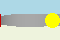

In [30]:
# sensing the visual scene (which sensor is used? What is the format of data?)
robot.device['camera'].getImage()

In [31]:
robot.device['camera'].getData()*255

array([[[173., 216., 230.],
        [173., 216., 230.],
        [173., 216., 230.],
        ...,
        [173., 216., 230.],
        [173., 216., 230.],
        [173., 216., 230.]],

       [[173., 216., 230.],
        [173., 216., 230.],
        [173., 216., 230.],
        ...,
        [173., 216., 230.],
        [173., 216., 230.],
        [173., 216., 230.]],

       [[173., 216., 230.],
        [173., 216., 230.],
        [173., 216., 230.],
        ...,
        [173., 216., 230.],
        [173., 216., 230.],
        [173., 216., 230.]],

       ...,

       [[238., 243., 221.],
        [238., 243., 221.],
        [238., 243., 221.],
        ...,
        [238., 243., 221.],
        [238., 243., 221.],
        [238., 243., 221.]],

       [[238., 243., 221.],
        [238., 243., 221.],
        [238., 243., 221.],
        ...,
        [238., 243., 221.],
        [238., 243., 221.],
        [238., 243., 221.]],

       [[238., 243., 221.],
        [238., 243., 221.],
        [238., 2

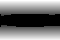

In [32]:
# sensing the scene depth (which sensor is used? What is the format of data?)
robot.device['depth_camera'].getImage()

In [33]:
robot.device['depth_camera'].getData()

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.9490196 , 0.9490196 , 0.9490196 ],
        [0.9490196 , 0.9490196 , 0.9490196 ],
        [0.9490196 , 0.9490196 , 0.9490196 ],
        ...,
        [0.9490196 , 0.9490196 , 0.9490196 ],
        [0.9490196 , 0.9490196 , 0.9490196 ],
        [0.9490196 , 0.9490196 , 0.9490196 ]],

       [[0.8980392 , 0.8980392 , 0.8980392 ],
        [0.8980392 , 0.8980392 , 0.8980392 ],
        [0.8980392 , 0.8980392 , 0.8980392 ],
        ...,
        [0.8980392 , 0.8980392 , 0.8980392 ],
        [0.8980392 , 0.8980392 , 0.8980392 ],
        [0.8980392 , 0.8980392 , 0.8980392 ]],

       ...,

       [[0.84705883, 0.84705883, 0.84705883],
        [0.84705883, 0.84705883, 0.84705883],
        [0.84705883, 0

In [34]:
# sensing scene light (which sensor is used? What is the format of data?)
robot.device['light'].getData()

[1.1943233804805564, 1.4010576432996171]

In [35]:
# sensing scene obstacles (which sensor is used? What is the format of data?)
robot.device['sonar'].getData()

[1.9991716326104834,
 1.9639474553798049,
 2,
 1.837615215940497,
 1.837615215940497,
 2,
 2,
 1.8250000000000002,
 1.8250000000000002,
 2,
 2,
 2,
 2,
 1.3845942078907054,
 1.9639474553798049,
 2.001523480321546]

In [36]:
# sensing gripper state (which sensor is used? What is the format of data?)
(robot.device['gripper'].armPosition,
 robot.device['gripper'].pose[0], 
 robot.device['gripper'].isMoving(),
 robot.device['gripper'].velocity)

(0.12, 0.225, False, 0.0)

In [37]:
# sensing the robot battery which sensor is used? What is the format of data?)
print("Actual Energy: ", robot.energy, ", Energy Lost per Step: ", robot.maxEnergyCostPerStep)

Actual Energy:  10000.0 , Energy Lost per Step:  1.0


**3. Let quickly analyze the available effectors of the pioneer robot.**

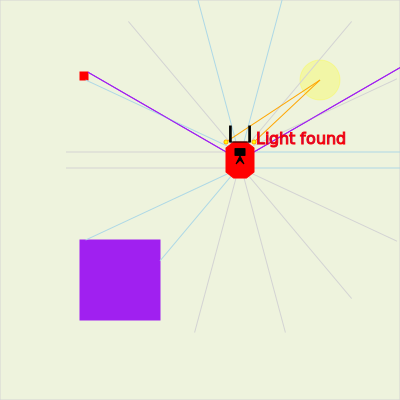

In [38]:
# speak through speakers
robot.device['speech'].speak(robot, vsim.canvas, 'Light found')
vsim.canvas

0.11


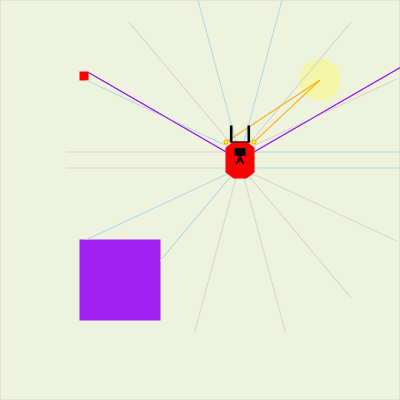

In [39]:
# move grippers
robot.device['gripper'].close()
#robot.device['gripper'].open()
robot.device['gripper'].step()
robot.device['gripper'].stop()
#robot.device['gripper'].update(robot)
vsim.update()
print(robot.device['gripper'].armPosition)
vsim.canvas

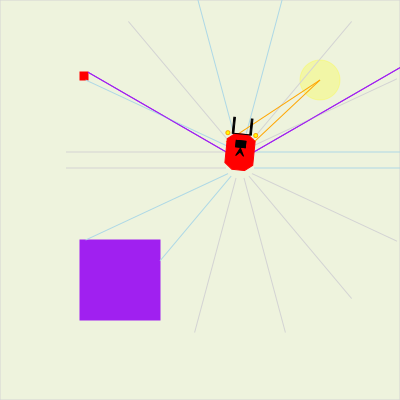

In [40]:
# move the robot
robot.move(1,-1)
robot.step()
vsim.update()
vsim.canvas

**4. Now that the environment and the robot have been built and analyzed, let build a build a cognitive function for performing a task and load the function into the robot brain.**

In [41]:
# TODO you can customize this function to accomplish your desired task
robot.brain = lambda self: self.move(1,-1)

# Exercise 2.2: Characteristics of Sensors

Now that we know which sensors are on board and why they are used for, let investigate how good they are in executing their respective functions. This leads us to sensor characteristics. We will focus on the following core characteristics:  "Range", "Resolution", "Accuracy", "Precision".

![Sensor Characteristics](imgs/characteristics.png "Characteristics of sensors" )


**1. Range (What is it?)**

In [42]:
# reading sensor range
print("Max Light: ", robot.device["light"].maxRange)
print("Max Sonar: ", robot.device["sonar"].maxRange)
print("Max Depth: ", robot.device["depth_camera"].maxDist)

Max Light:  3
Max Sonar:  2
Max Depth:  2.0


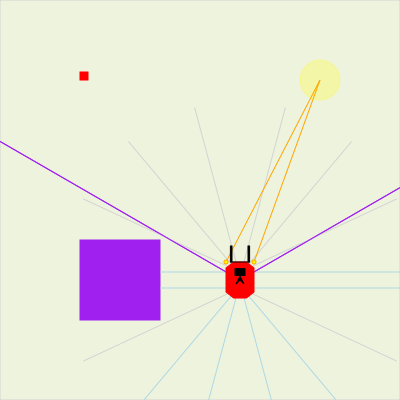

In [43]:
# testing these characteristics
robot.setPose(3, 1.5, a = 0)
vsim.update()
vsim.canvas

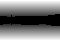

In [44]:
robot.device['depth_camera'].getImage()

In [45]:
print("Light: ", robot.device['light'].getData())
print("Sonar: ", robot.device['sonar'].getData()[2:6])
print("Depth: ", (1-np.min(robot.device['depth_camera'].getData()[18:22, 28:32,:]))*robot.device['depth_camera'].maxDist)

Light:  [0.32961185563959505, 0.43502324395049063]
Sonar:  [2, 2, 2, 2]
Depth:  2.0


**2. Resolution (What is it?)**

In [46]:
# Camera resolution

# nber of pixels / unit of area = pixel size 
print("nber of pixelsk: ", robot.device['depth_camera'].getData().shape)

# nber of bits for pixel encoding?
print("nber of bits / pixel: ",np.ceil(np.log(len(color.colorMap))/np.log(2)))

# examine color image
robot.device['camera'].getImage().save("test.png")
robot.device['camera'].getImage()
print(len(color.colorMap))

nber of pixelsk:  (40, 60, 3)
nber of bits / pixel:  10.0
658


**3. Accuracy (What is it?)**

In [47]:
# compute the average

exact_distance=1.0
measurements=[]
for i in range(100000):
    measurements.append(robot.device['sonar'].getData()[0])
expected_distance=np.average(np.array(measurements))
accuracy=100*(1-np.abs(expected_distance-exact_distance)/exact_distance)
print("exact distance: ", exact_distance)
print("expected distance: ", expected_distance)
print("accuracy: ", accuracy,"%")

exact distance:  1.0
expected distance:  0.8249796051891045
accuracy:  82.49796051891045 %


**Where does this systematic error originate from?**

**4. Precision (What is it?)**

In [48]:
# compute the standard deviation
print("standard deviation: ", np.std(np.array(measurements)))
print("precision: ", 100*(1-np.std(np.array(measurements))/expected_distance), "%")

standard deviation:  0.0040948469307705735
precision:  99.5036426470407 %


**Where does this random error originate from?**

# Exercise 2.3: Sensor Model and Fusion

Sensor model is the mathematical description of the relation between the target physical phenomenon/quantity and the sensor output. Sensor fusion is the process of combining multiple sensors/estimators to achieve a better estimator with the respect to the sensor characteristics discussed above. We will discuss three major fusion techniques namely the specifc technique of stereo-vision, and the less specific BLUE technique and the generic bayesian technique.

**1. Stereo-vision (What is it?)**

![Stereo-Vision](imgs/stereo-vision.png "Stereo Vision" )
   

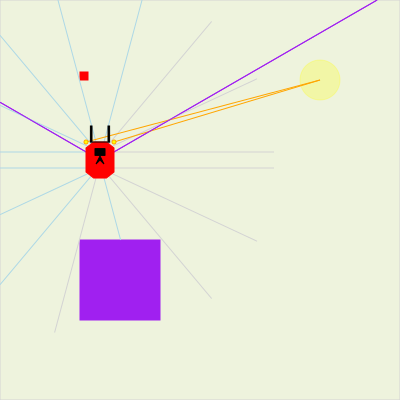

In [49]:
# let take the robot close to the red block of the environment
robot.setPose(1.25, 3., a=0.)
cam1_pose=robot.getPose()
vsim.update()
vsim.canvas

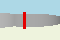

In [50]:
# let see what the robot see through the first camera
cam1_image=robot.device['camera'].getImage()
cam1_image.save('setero1.png')
cam1_image

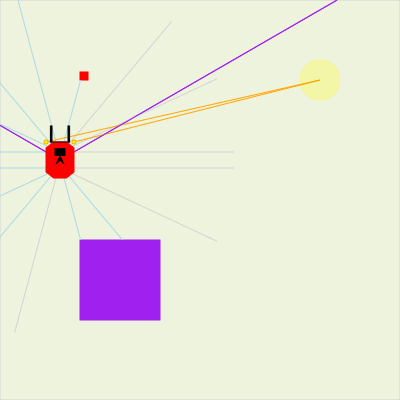

In [51]:
# let take the robot close to the red block of the environment
robot.setPose(0.75, 3., a=0.)
cam2_pose=robot.getPose()
vsim.update()
vsim.canvas

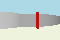

In [52]:
# let see what the robot see through the camera
cam2_image=robot.device['camera'].getImage()
cam2_image.save('setero2.png')
cam2_image

In [53]:
# TODO - Calibration of the camera. Determine the camera intrinsic parameters
img2=np.array(cam2_image)
img1=np.array(cam1_image)
target_color=[255,0,0]
x1_list=[]
y1_list=[]
x2_list=[]
y2_list=[]
for i in range(img1.shape[0]):
    for j in range (img1.shape[1]):
        if img1[i][j][2]==0 and img1[i][j][1]==0 and img1[i][j][0]>target_color[0]/2:
            x1_list.append(i)
            y1_list.append(j)
        if img2[i][j][2]==0 and img2[i][j][1]==0 and img2[i][j][0]>target_color[0]/2:
            x2_list.append(i)
            y2_list.append(j)
target_in_cam1=(int(np.floor(np.average(np.array(x1_list)))),int(np.floor(np.average(np.array(y1_list)))))
target_in_cam2=(int(np.floor(np.average(np.array(x2_list)))),int(np.floor(np.average(np.array(y2_list)))))
print("target in cam 1: ",target_in_cam1)
print("target in cam 2: ",target_in_cam2)

target in cam 1:  (20, 24)
target in cam 2:  (19, 37)


In [54]:
# TODO - Apply the formulas above to estimate the distance between the robot and the red box

In [56]:
# the color camera itself is a fusion of three monochromatic cameras (red, blue, green) Vs Light sensors (intensity)
imr=np.zeros(img1.shape, dtype='uint8')
img=np.zeros(img1.shape, dtype='uint8')
imb=np.zeros(img1.shape, dtype='uint8')
imr[:,:,0]=img1[:,:,0]
img[:,:,1]=img1[:,:,1]
imb[:,:,2]=img1[:,:,2]
img_red=Image.fromarray(imr)
img_green=Image.fromarray(img)
img_blue=Image.fromarray(imb)

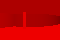

In [57]:
img_red

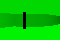

In [58]:
img_green

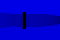

In [59]:
img_blue

**2. BLUE - Best Linear Unbiased Estimator (What is it?)**

![Best Linear Unbiased Estimator](imgs/BLUE.png "Best Linear Unbiased Estimator" )

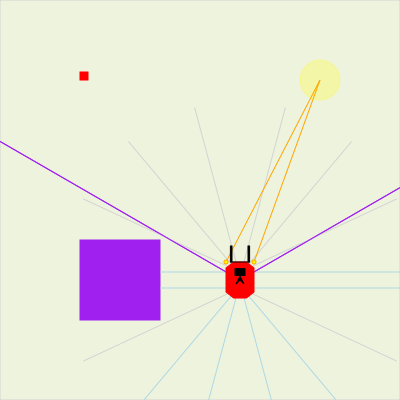

In [60]:
robot.setPose(3, 1.5, a = 0)
vsim.update()
vsim.canvas

In [61]:
exact_distance=1.0
measurements=[]
for i in range(100000):
    measurements.append(robot.device['sonar'].getData()[15])
expected_distance=np.average(np.array(measurements))
accuracy=100*(1-np.abs(expected_distance-exact_distance)/exact_distance)
print("exact distance: ", exact_distance)
print("expected distance: ", expected_distance)
print("accuracy: ", accuracy,"%")

# compute the standard deviation
print("standard deviation: ", np.std(np.array(measurements)))
print("precision: ", 100*(1-np.std(np.array(measurements))/expected_distance), "%")

exact distance:  1.0
expected distance:  0.8250042413519595
accuracy:  82.50042413519594 %
standard deviation:  0.00210392335447912
precision:  99.74498029840049 %


In [62]:
# TODO. Find the BLUE out of SoNar[0] and sonar[15]. Show that the BLUE is unbiased and more precise.

**3. Bayesian Fusion - A Generic Formulation of Fusion (What is it?)**

![Bayesian Fusion](imgs/bayes.png "Bayesian Fusion" )

Imagine that we are interested in measuring the distance between the robot and specific objects in the scene. Let take as target object the robot storage room.

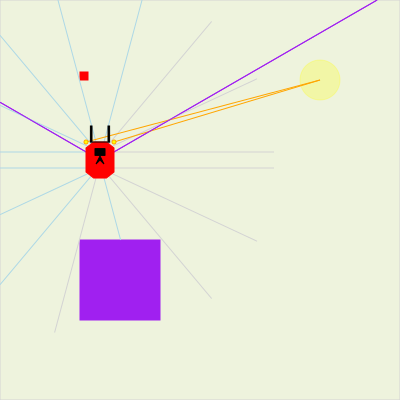

In [63]:
robot.setPose(1.25, 3., a=0.)
cam1_pose=robot.getPose()
vsim.update()
vsim.canvas

In [64]:
# The prior knowledge Kt about the world tells us that the storage room is red painted (see line [2]).
# Probability is 1.0. If two colors possible, then probability is 1/2

# Based on this knowledge, we identify position on the room on the color image (see line [31]). 
# There is only one red object in the world, so the probability of this match is 1.0. if two objects, probability is 1/2 
x_room,y_room=(20, 24)
print(robot.device['camera'].getData()[x_room, y_room,:]*255)
# Based on this position, we extract the depth of the room from the depth image (see line [23])
# Probability depends on the accuracy and precision of the depth camera
print("Rd Room Depth: ", (1-np.max(robot.device['depth_camera'].getData()[x_room, y_room,:]))*robot.device['depth_camera'].maxDist)



[229.   0.   0.]
Rd Room Depth:  1.0196078419685364


## Exercise 2.4: Sensor Noise and Denoising

We have seen that sensor data are subject to noise (random and systematic errors) and would require to undergo a denoising process, consisting in discarding noise from data, before using the data. Though some representation and processing frameworks such as bayesian networks, deep neural networks take this noise into consideration, most cheaper and efficient approaches requires an explicit denoising of the sensor data. We consider two fundamental denoising techniques namely the Decomposition-Filtering technique and the interpolation technique.


![Sensor Noise](imgs/noise.png "Sensor Noise" )


**1. Decomposition-Filtering Denoising Technique**

Any signal is made up of components, constant components (e.g., systematic errors), high-frequency components (e.g., random errors) and low-frequency components (e.g., exact signal). For denoising, the signal is decomposed into components, undesired components are filtered out and the signal is reconstructed from remaining desired components.

![Fourier Denoising](imgs/fourier.png "Fourier Denoising" )



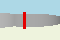

In [65]:
# explicit method:  fast fourier transform

#save image
robot.device['camera'].getImage().save('original_image.png')
robot.device['camera'].getImage()

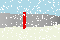

In [66]:
# noisy image (pepper-and-salt noise)
in_image=robot.device['camera'].getData()*255
for i in range(in_image.shape[0]):
    for j in range(in_image.shape[1]):
         if random.random()<0.1:
             in_image[i][j]=np.array([255,255,255],dtype='uint8')
in_image=np.array(in_image, dtype='uint8')
Image.fromarray(in_image).save('noisy_image.png')
Image.fromarray(in_image)

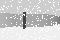

In [67]:
#let convert the image to grayscale for simplicity
in_gray_image=ImageOps.grayscale(Image.fromarray(in_image)) 
in_gray_image.save('noisy_gray_image.png')
in_gray_image

Text(0.5, 1.0, 'Fourier Image Decomposition')

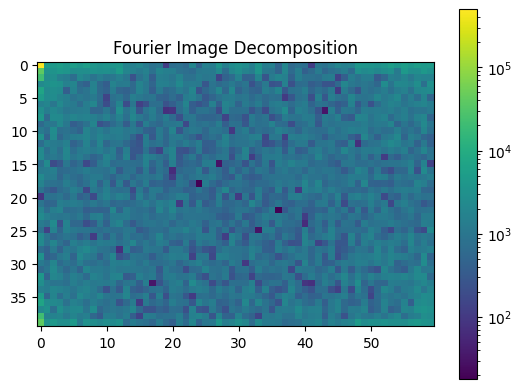

In [68]:
# decompose noisy image
in_gray_image=np.array(in_gray_image)
decomposed_image= fftpack.fft2(in_gray_image)
#print(np.abs(decomposed_image))
plt.imshow(np.abs(decomposed_image),norm=LogNorm())
plt.colorbar()
plt.title('Fourier Image Decomposition')

Text(0.5, 1.0, 'Filtered Fourier Decomposition')

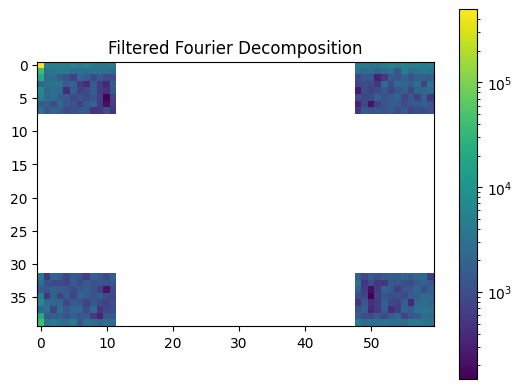

In [69]:
# remove all other components except very low and high frequency components

kernel = 0.2
decomposed_image2 = decomposed_image.copy()
row, col = decomposed_image2.shape

# Zero the undesired coefficients of the undesired components
decomposed_image2[int(row*kernel):int(row*(1-kernel))] = 0
decomposed_image2[:, int(col*kernel):int(col*(1-kernel))] = 0

plt.imshow(np.abs(decomposed_image2),norm=LogNorm())
plt.colorbar()
plt.title('Filtered Fourier Decomposition')

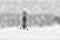

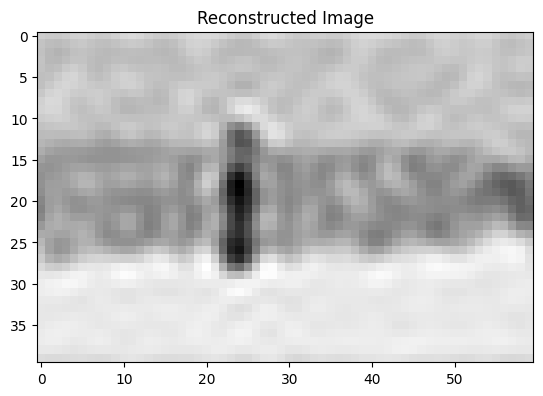

In [70]:
# reconstruct image with filtered fourier decomposition
out_image = fftpack.ifft2(decomposed_image2).real
denoised_image=Image.fromarray(np.array(np.floor(out_image), dtype='uint8'))
denoised_image.save('denoised_image.png')
plt.imshow(out_image, plt.cm.gray)
plt.title('Reconstructed Image')
denoised_image

In [71]:
# implicit method: weighted moving average - Infinite Inpulse Response Low-Pass Filter
# y[n+1]=alpha*y[n] + (1-alpha)*x[n+1]

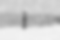

In [72]:
# implicit method: Gaussian filter or blurring
#filtered_image = Image.fromarray(in_image).filter(ImageFilter.GaussianBlur(radius=2))
filtered_image = Image.fromarray(in_gray_image).filter(ImageFilter.GaussianBlur(radius=2))
filtered_image.save('denoised_gaussian_image.png')
filtered_image

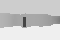

In [73]:
# implicit method: Median filter
#filtered_image = Image.fromarray(in_image).filter(ImageFilter.MedianFilter(size=3))
filtered_image = Image.fromarray(in_gray_image).filter(ImageFilter.MedianFilter(size=5))
filtered_image.save('denoised_median_image.png')
filtered_image

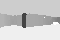

In [74]:
# implicit method: Mode filtering
#filtered_image = Image.fromarray(in_image).filter(ImageFilter.ModeFilter(size=3))
filtered_image = Image.fromarray(in_gray_image).filter(ImageFilter.ModeFilter(size=5))
filtered_image.save('denoised_mode_image.png')
filtered_image

**2. Interpolation Denoising Technique**

Noise can also originate from missing value due to poor sensor range, resolution, interaction, failure, ... The interpolation is a wide-spread technique which allows in this case to recover missing value. The technique is also used when downscaling the sensor data for fast processing.

![Interpolation](imgs/interpolation.png "Interpolation" )

Let apply this technique to get a full-range sonar instead of just a 16-range. 

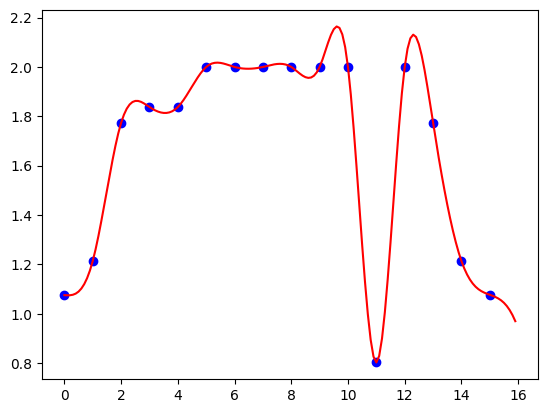

In [75]:
# get the sonar data
x_sonar=np.arange(16)
y_sonar=robot.device['sonar'].getData()
plt.scatter(x_sonar, y_sonar,color = '#0000FF')
denoised_sonar = CubicSpline(x_sonar,y_sonar,bc_type='natural')
xs_sonar=np.arange(0,16,0.1)
ys_sonar=denoised_sonar(xs_sonar)
plt.plot(xs_sonar, ys_sonar,color = '#FF0000')
plt.show()

# GO AND LEARN MORE (MERY CHRISTMAS AND HAPPY NEW YEAR)